# Analyzing the data of an Advertising Company and to predict the sales based on expenditures. Also to determine the important feature the advertising company should focus on more in order to increase sales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.express as px

In [2]:
sns.set_theme(color_codes=True)
sns.set_style('whitegrid')
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


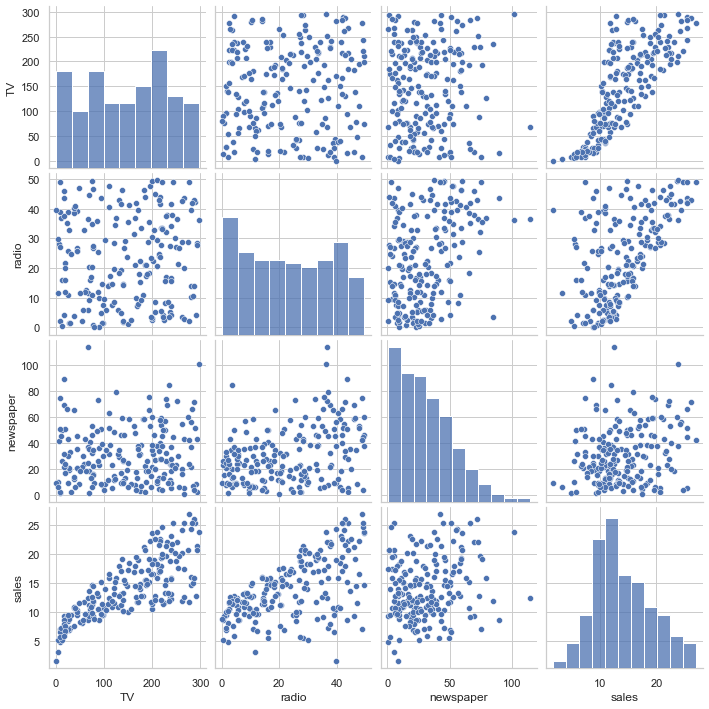

In [5]:
sns.pairplot(df)

In [6]:
df.corr()['sales'].sort_values()

newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

In [7]:
X = df.drop('sales',axis=1)
y = df['sales']

## We can use Polynomial Regression to improve upon Linear Regression
## There are two issues Polynomial Regression will address for us:
### Non-Linear feature relationships to label
### Interaction terms between features (features significant/more significant when in sync with each other)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
Polynomial_converter = PolynomialFeatures(include_bias=False)

In [10]:
Polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [11]:
poly_features = Polynomial_converter.transform(X)

In [12]:
poly_features.shape

(200, 9)

In [13]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
pred = model.predict(X_test)

In [20]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [22]:
MAE = mean_absolute_error(y_test,pred)
print('MAE',MAE)
MSE = mean_squared_error(y_test,pred)
print('MSE',MSE)
RMSE = np.sqrt(MSE)
print('RMSE',RMSE)

MAE 0.489679804480372
MSE 0.44175055104035693
RMSE 0.6646431757269136
